## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Download data from IBM
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-05-02 13:44:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2019-05-02 13:44:39 (687 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Predict Engine Size v.s CO2 Emission

Text(0, 0.5, 'CO2 Emission')

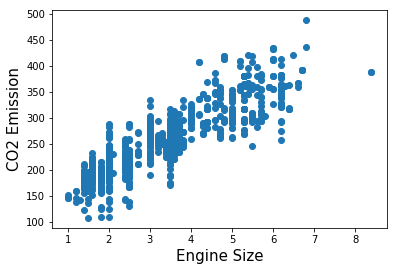

In [7]:
X = df.ENGINESIZE.values
y = df.CO2EMISSIONS.values
plt.scatter(X,y)
plt.xlabel('Engine Size', size=15)
plt.ylabel('CO2 Emission', size=15)

In [14]:
## Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

R-Squared Value: 0.7650473724164306
Mean Square Error: 952.226222479037
Root Mean Square Error: 30.858162979656406


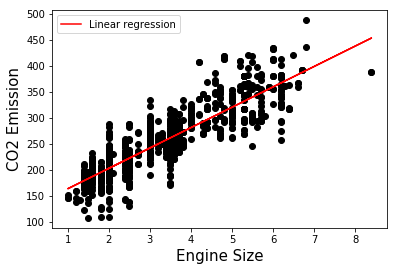

In [31]:
## Linear Regression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
LR.fit(X_train,y_train) # Linear Regression Model training 
R2 = LR.score(X_test,y_test) # Prediction: using R^2
print('R-Squared Value: {}'.format(R2))

## Other Evaluation Methods
y_predict = LR.predict(X_test)
MSE = mean_squared_error(y_test,y_predict)
RMSE = MSE**0.5
print('Mean Square Error: {}'.format(MSE))
print('Root Mean Square Error: {}'.format(RMSE))

## Plot
plt.scatter(X,y, c='black')
plt.plot(X, LR.intercept_+LR.coef_*X, c='r' , label='Linear regression')
plt.xlabel('Engine Size', size=15)
plt.ylabel('CO2 Emission',size=15)
plt.legend()